Всем привет! В данном ноутбуке представлено мое решение учебного [соревнования по кредитному скорингу](https://www.kaggle.com/competitions/findata-creditscoring/overview). Это чистовой вариант, так что тут не будет постоянной проверки датасета после малейшего изменения (черновик вам лучше не видеть, боюсь знающий человек ужаснется, когда увидит этого монстра 😅) Нам необходимо построить модель машинного обучения, которая на основании данных из заявления о выдаче кредита предсказывает, вернет ли заемщик этот кредит. Давайте ознакомимся с данными:

* **Loan ID**: уникальный идентификатор кредита;
* **Customer ID**: уникальный идентификатор клиента;
* **Loan Status**: категориальный признак - кредит погашен ("Fully Paid") или не погашен ("Charged Off");
* **Current Loan Amount**: размер кредита;
* **Term**: срок кредита;
* **Credit Score**: кредитный рейтинг - число от 0 до 800;
* **Years in current job**: стаж на текущем месте работы;
* **Home Ownership**: статус недвижимости - собственность ("Own"), ипотека ("Home Mortgage") или аренда ("Rent");
* **Annual Income**: годовой доход;
* **Purpose**: цель кредита;
* **Monthly Debt**: размер ежемесячного платежа по текущим кредитам;
* **Years of Credit History**: количество лет кредитной истории;
* **Months since last delinquent**: количество месяцев с последнего нарушения условий кредита;
* **Number of Open Accounts**: количество открытых кредитных карт;
* **Number of Credit Problems**: количество кредитных проблем;
* **Current Credit Balance**: суммарный текущий долг;
* **Maximum Open Credit**: максимальный кредитный лимит из всех источников;
* **Bankruptcies**: количество банкротств;
* **Tax Liens**: количество нарушений налогового законодательства.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


Загрузим **train** и **test**. Для удобства дальнейшей обработки добавим маркер **is_test**. 

In [ ]:
df_train = pd.read_csv("sample_data/credit_train.csv")
df_test = pd.read_csv("sample_data/credit_test.csv")

df_train["is_test"] = False
df_test["is_test"] = True

Первым делом предлагаю дропнуть все дубликаты в тренировочной выборке. И соединить данные в один датасет.

In [ ]:
df_train = df_train.drop_duplicates()
df = pd.concat([df_train, df_test])
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,is_test
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0,False
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0,False
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0,False
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0,False
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,8ee2002b-8fb6-4af0-ab74-25a1c23e7647,NaN,157806,Short Term,731.0,1514376.0,6 years,Rent,Debt Consolidation,4795.41,12.5,NaN,9,0,87058,234410.0,0.0,0.0,True
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,6c306306-f5c2-4db5-b74a-af2895123ecb,NaN,132550,Short Term,718.0,763192.0,4 years,Home Mortgage,Debt Consolidation,12401.87,9.9,20.0,8,0,74309,329692.0,0.0,0.0,True
9997,da9870de-4280-46a3-8fc6-91cfe5bfde9d,cc94e25e-1060-4465-b603-194e122f0239,NaN,223212,Long Term,NaN,NaN,NaN,Rent,Debt Consolidation,4354.42,27.2,NaN,8,1,99636,568370.0,1.0,0.0,True
9998,0cc8e0e0-1bc6-49d7-ad0f-0598b647458f,f90cf410-a34b-49e7-8af9-2b405e17b827,NaN,99999999,Short Term,721.0,972097.0,10+ years,Home Mortgage,Debt Consolidation,12232.20,16.8,24.0,8,1,184984,240658.0,0.0,0.0,True


Далее необходимо ознакомиться с пропусками в данных. Построим тепловую карту пропусков по всему датасету.

Loan ID - 0%
Customer ID - 0%
Loan Status - 10%
Current Loan Amount - 0%
Term - 0%
Credit Score - 21%
Annual Income - 21%
Years in current job - 4%
Home Ownership - 0%
Purpose - 0%
Monthly Debt - 0%
Years of Credit History - 0%
Months since last delinquent - 54%
Number of Open Accounts - 0%
Number of Credit Problems - 0%
Current Credit Balance - 0%
Maximum Open Credit - 0%
Bankruptcies - 0%
Tax Liens - 0%
is_test - 0%


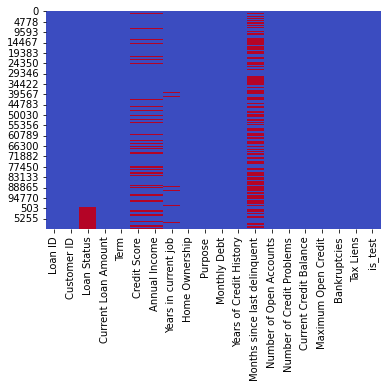

In [ ]:
cols = df.columns 
sns.heatmap(df[cols].isnull(), cmap= 'coolwarm', cbar=False)

for col in cols:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

**Months since last delinquent** имеет более 50% пропусков. Удалим эту фичу из исходного датасета.

In [ ]:
df = df.drop(['Months since last delinquent'], axis=1)

Пройдемся по численным признакам и заменим пропуски медианными оценками. **Credit score** пока трогать не будем, есть пара мыслей на его счет.

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    if col != 'Credit Score':
        missing = df[col].isnull()
        num_missing = np.sum(missing)
    
    if num_missing > 0: 
        print('imputing missing values for: {}'.format(col))
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: Annual Income
imputing missing values for: Maximum Open Credit
imputing missing values for: Bankruptcies
imputing missing values for: Tax Liens


Аналогично для категориальных, главное не заменить значения в **Loan Status**.

In [ ]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0 and num_missing != 10000: 
        print('imputing missing values for: {}'.format(col))
        
        top = df[col].describe()['top'] 
        df[col] = df[col].fillna(top)

imputing missing values for: Years in current job


Теперь давайте взглянем на малоинформативные столбцы. 

In [ ]:
num_rows = len(df.index)
low_information_cols = [] #
for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Tax Liens: 98.12096%
0.0     97910
1.0      1305
2.0       354
3.0       113
4.0        60
5.0        17
6.0        10
7.0         6
9.0         5
8.0         2
11.0        1
15.0        1
10.0        1
Name: Tax Liens, dtype: int64



Давайте удалим его.

In [ ]:
df = df.drop(['Tax Liens'], axis=1)

Далее ознакомимся со зачениями некоторых категориальных столбцев. Может быть найдем что-то интересное)

In [ ]:
df['Term'].value_counts(dropna=False)

Short Term    73318
Long Term     26467
Name: Term, dtype: int64

In [ ]:
df['Home Ownership'].value_counts(dropna=False)

Home Mortgage    48415
Rent             42058
Own Home          9113
HaveMortgage       199
Name: Home Ownership, dtype: int64

In [ ]:
df['Purpose'].value_counts(dropna=False)

Debt Consolidation      78712
Home Improvements        5830
other                    5796
Other                    3190
Business Loan            1529
Buy a Car                1307
Medical Bills            1096
Buy House                 652
Take a Trip               532
major_purchase            382
small_business            286
moving                    149
wedding                   115
Educational Expenses      105
vacation                   95
renewable_energy            9
Name: Purpose, dtype: int64

In [ ]:
df['Years in current job'].value_counts(dropna=False)

10+ years    35069
2 years       9170
3 years       8205
< 1 year      8160
5 years       6832
1 year        6480
4 years       6124
6 years       5700
7 years       5543
8 years       4593
9 years       3909
Name: Years in current job, dtype: int64

Меня заинтересовал признак **Purpose**. Целей для взятия кредита слишком много, можно попробовать их как-то классифицировать.

Потребительские кредиты:

In [ ]:
df.loc[df['Purpose']=='Home Improvements', 'Purpose'] = 'Consumer credit'
df.loc[df['Purpose']=='Buy a Car', 'Purpose'] = 'Consumer credit'
df.loc[df['Purpose']=='Buy House', 'Purpose'] = 'Consumer credit'
df.loc[df['Purpose']=='Take a Trip', 'Purpose'] = 'Consumer credit'
df.loc[df['Purpose']=='major_purchase', 'Purpose'] = 'Consumer credit'
df.loc[df['Purpose']=='moving', 'Purpose'] = 'Consumer credit'
df.loc[df['Purpose']=='wedding', 'Purpose'] = 'Consumer credit'
df.loc[df['Purpose']=='Educational Expenses', 'Purpose'] = 'Consumer credit'
df.loc[df['Purpose']=='vacation', 'Purpose'] = 'Consumer credit'
df.loc[df['Purpose']=='Medical Bills', 'Purpose'] = 'Consumer credit'

Кредиты на бизнес:

In [ ]:
df.loc[df['Purpose']=='Business Loan', 'Purpose'] = 'Business'
df.loc[df['Purpose']=='small_business', 'Purpose'] = 'Business'
df.loc[df['Purpose']=='renewable_energy', 'Purpose'] = 'Business'

В даннах 2 разные записи для прочих целей (**other** и **Other**): 

In [ ]:
df.loc[df['Purpose']=='other', 'Purpose'] = 'Other'

In [ ]:
df['Purpose'].value_counts(dropna=False)

Debt Consolidation    78712
Consumer credit       10263
Other                  8986
Business               1824
Name: Purpose, dtype: int64

Далее перейдем к признаку **Years in current job**. Разобьем стаж работы на 4 группы.

In [ ]:
df.loc[df['Years in current job']=='1 year', 'Years in current job'] = '1-6 years'
df.loc[df['Years in current job']=='2 years', 'Years in current job'] = '1-6 years'
df.loc[df['Years in current job']=='3 years', 'Years in current job'] = '1-6 years'
df.loc[df['Years in current job']=='4 years', 'Years in current job'] = '1-6 years'
df.loc[df['Years in current job']=='5 years', 'Years in current job'] = '1-6 years'

df.loc[df['Years in current job']=='6 years', 'Years in current job'] = '6-10 years'
df.loc[df['Years in current job']=='7 years', 'Years in current job'] = '6-10 years'
df.loc[df['Years in current job']=='8 years', 'Years in current job'] = '6-10 years'
df.loc[df['Years in current job']=='9 years', 'Years in current job'] = '6-10 years'

In [ ]:
df['Years in current job'].value_counts(dropna=False)

1-6 years     36811
10+ years     35069
6-10 years    19745
< 1 year       8160
Name: Years in current job, dtype: int64

Что же дальше? Уже забыли про **Score**? Очевидно, что этот признак будет влиять на предсказание нашей модели наибольшим образом. В данном случае заменить пропущенные значения медианами - плохая идея. У меня возникла мысль! Почему бы нам не попробовать предсказать этот скор, а потом уже целевую переменную?


Разобьем все фичи на числовые и категориальные.

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Current Loan Amount' 'Credit Score' 'Annual Income' 'Monthly Debt'
 'Years of Credit History' 'Number of Open Accounts'
 'Number of Credit Problems' 'Current Credit Balance'
 'Maximum Open Credit' 'Bankruptcies']
['Loan ID' 'Customer ID' 'Loan Status' 'Term' 'Years in current job'
 'Home Ownership' 'Purpose' 'is_test']


Нормализуем числовые признаки, категориальные закодируем с помощью **one-hot** кодирования.

In [ ]:
from sklearn.preprocessing import StandardScaler

markers = df[['Loan Status', "is_test"]]
temp_df = df.drop(['Loan ID', 'Customer ID', 'Loan Status', "is_test"], axis=1)
object= StandardScaler()

for col in temp_df.columns:
    print(col)
    if col in numeric_cols and col != 'Credit Score':
        temp_df[col] = object.fit_transform(temp_df[[col]])
    if col in non_numeric_cols:
        temp_df = pd.concat([temp_df, pd.get_dummies(temp_df[col], prefix=col)], axis=1)
        temp_df = temp_df.drop([col], axis=1)
temp_df.head()

Current Loan Amount
Term
Credit Score
Annual Income
Years in current job
Home Ownership
Purpose
Monthly Debt
Years of Credit History
Number of Open Accounts
Number of Credit Problems
Current Credit Balance
Maximum Open Credit
Bankruptcies


,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Years in current job_6-10 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business,Purpose_Consumer credit,Purpose_Debt Consolidation,Purpose_Other
0,-0.376355,709.0,-0.169863,-1.083356,-0.148924,-1.023598,1.738236,-0.175240,-0.041813,2.543570,...,1,0,0,1,0,0,0,1,0,0
1,-0.381881,NaN,-0.168623,1.223883,0.405612,4.774886,-0.343571,-0.170462,0.010035,-0.331716,...,0,0,0,1,0,0,0,0,1,0
2,2.628419,741.0,0.932798,0.887389,-0.475958,1.375775,1.738236,0.011481,-0.001994,-0.331716,...,1,0,0,0,1,0,0,0,1,0
3,-0.379306,721.0,-0.543368,-0.793554,-0.888305,-0.423754,-0.343571,-0.099972,-0.045371,-0.331716,...,0,0,0,0,1,0,0,0,1,0
4,-0.384480,NaN,-0.168623,0.184005,-1.727218,0.775932,-0.343571,-0.107646,-0.040567,-0.331716,...,0,0,0,0,0,1,0,0,1,0


Выберем из датасета только те записи, в которых не содержатся пропуски. Также удалим некоторые выбросы и нормализуем.

In [ ]:
train = temp_df[temp_df['Credit Score'].notnull()]
train = train[train['Credit Score'] <= 800]
train['Credit Score'] = object.fit_transform(train[['Credit Score']])
temp_df['Credit Score'] = object.fit_transform(temp_df[['Credit Score']])
train.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Years in current job_6-10 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business,Purpose_Consumer credit,Purpose_Debt Consolidation,Purpose_Other
0,-0.376355,-0.354558,-0.169863,-1.083356,-0.148924,-1.023598,1.738236,-0.175240,-0.041813,2.543570,...,1,0,0,1,0,0,0,1,0,0
2,2.628419,0.792636,0.932798,0.887389,-0.475958,1.375775,1.738236,0.011481,-0.001994,-0.331716,...,1,0,0,0,1,0,0,0,1,0
3,-0.379306,0.075640,-0.543368,-0.793554,-0.888305,-0.423754,-0.343571,-0.099972,-0.045371,-0.331716,...,0,0,0,0,1,0,0,0,1,0
6,-0.383230,0.398288,-0.152562,-0.619929,0.192329,0.376036,1.738236,-0.458827,-0.059097,2.543570,...,0,1,0,1,0,0,0,0,1,0
8,-0.373237,-1.465903,1.271779,0.021370,0.618895,-1.423493,-0.343571,0.383752,-0.025293,-0.331716,...,0,0,0,0,0,1,0,0,1,0


Будем использовать **xgboost**. Разобьем выборку, избавимся от лишних символов в названиях колонок (библиотека такое не любит). В качестве метрики ошибки будем использовать MSE - среднюю квадратичную ошибку.

In [ ]:
import re
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X = train.drop(['Credit Score'], axis=1)
Y = train['Credit Score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=.20, random_state=0)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

model = xgboost.XGBClassifier()
model.fit(X_train, Y_train)
predict = model.predict(X_test)

MSE = mean_squared_error(Y_test,predict)
print("MSE value: ",MSE)
predict

C:\Users\Makellan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
MSE value:  0.8547017701833747


array([ 0.46998769,  0.97188516,  0.97188516, ..., -0.46210761,
       -0.39040797, -0.39040797])

Предскажем скор на тестовой выборке и вставим предикшн на место пропусков.

In [ ]:
test = temp_df[temp_df['Credit Score'].isnull() == True].drop(['Credit Score'], axis=1)
test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test.columns.values]
xgboost_predict = model.predict(test)
xgboost_predict.size

21135

In [ ]:
temp_df.loc[temp_df['Credit Score'].isnull() == True, 'Credit Score'] = xgboost_predict

Вернем целевой столбец и маркер на место. Заменим значения **Fully Paid** на 1 и **Charged Off** на 1 соответственно. Убедимся, что избавились от всех пропусков.

In [ ]:
temp_df['Loan Status'] = markers['Loan Status']
temp_df['is_test'] = markers['is_test']

In [ ]:
temp_df.loc[(df['Loan Status'] == 'Fully Paid'), 'Loan Status'] = 1
temp_df.loc[(df['Loan Status'] == 'Charged Off'), 'Loan Status'] = 0

In [ ]:
temp_df.isnull().sum()

Current Loan Amount                    0
Credit Score                           0
Annual Income                          0
Monthly Debt                           0
Years of Credit History                0
Number of Open Accounts                0
Number of Credit Problems              0
Current Credit Balance                 0
Maximum Open Credit                    0
Bankruptcies                           0
Term_Long Term                         0
Term_Short Term                        0
Years in current job_1-6 years         0
Years in current job_10+ years         0
Years in current job_6-10 years        0
Years in current job_< 1 year          0
Home Ownership_HaveMortgage            0
Home Ownership_Home Mortgage           0
Home Ownership_Own Home                0
Home Ownership_Rent                    0
Purpose_Business                       0
Purpose_Consumer credit                0
Purpose_Debt Consolidation             0
Purpose_Other                          0
Loan Status     

Можем переходить к предсказанию целевой переменной. Обучаться будем на **train** предсказывать на **test**.

In [ ]:
train = temp_df[temp_df['Loan Status'].isnull() == False]
test = temp_df[temp_df['Loan Status'].isnull() == True]

In [ ]:
X = train.drop(['Loan Status', 'is_test'], axis=1)
y = train['Loan Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=28)
y_train=y_train.astype('int') 
y_test=y_test.astype('int') 

Предсказывать будем также с помощью xgboost, но в данном случае сделаем подбор параметров но grid сетке.

In [ ]:
from numpy.core.numeric import binary_repr
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


X = train.drop(['Loan Status', 'is_test'], axis=1)
Y = train['Loan Status']

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]
Y=Y.astype('int') 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=.20, random_state=0) 





model = xgboost.XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)


parameters = {
              'max_depth': range (2, 10, 1),
              'n_estimators': range(60, 220, 40),
              'learning_rate': [0.1, 0.01, 0.05]
              }

grid_search = GridSearchCV(model, parameters, n_jobs=10, 
                   cv=10, 
                   scoring='accuracy',
                   verbose=True)
grid_result = grid_search.fit(X, Y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 96 candidates, totalling 960 fits


C:\Users\Makellan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:27:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.799933 using {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}


Я столько ждал ради accuracy 0.79 \😞/
Ну чтож, попробуем прогнать данные через модель с полученными параметрами.

In [ ]:
from sklearn.metrics import accuracy_score

model = xgboost.XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42, learning_rate = 0.05, max_depth = 8, n_estimators = 100)
model.fit(X_train, Y_train)
predict = model.predict(X_test)
accuracy = accuracy_score(Y_test,predict)
print("MSE value: ",accuracy)

[21:20:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
MSE value:  0.7972935345547697


Сделаем предикт на тесте, подготовим итоговый датафрейм. Сабмит готов!

In [ ]:
X_test = test.drop(['Loan Status', 'is_test'], axis=1)
Y_test = test['Loan Status']

In [ ]:
predict = model.predict(X_test)
test = pd.read_csv('sample_data/credit_test.csv')
predict = pd.DataFrame(predict)
predict.loc[(predict[0] == 1), 0] = 'Fully Paid'
predict.loc[(predict[0] == 0), 0] = 'Charged Off'

output = pd.DataFrame({'Loan ID':test['Loan ID'],'Loan Status':predict[0]})
output.to_csv('submission.csv', index=False)